In [1]:
import math
import meep as mp
from meep import mpb
import matplotlib.pyplot as plt
import pandas as pd

# 1. Bandstructure for perfect crystal

First, we initialize the crystal structure, using a triangular lattice with airholes of radius 0.3a. The background material is Indium Aluminum Arsenide, with refractive index 3.23 (is this correct?).

In [129]:
k_points = [mp.Vector3(),              # Gamma
              mp.Vector3(math.sqrt(3) / 4, math.sqrt(3) / 4),  # point to the right of gamma
]            

k_points = mp.interpolate(8, k_points)

geometry_lattice = mp.Lattice(size=mp.Vector3(3, 3),
                                 basis1=mp.Vector3(math.sqrt(3) / 2, 0.5),
                                 basis2=mp.Vector3(math.sqrt(3) / 2, -0.5))

# Initialize the holes. 
geometry = [mp.Cylinder(0.3, material=mp.air)]
geometry = mp.geometric_objects_lattice_duplicates(geometry_lattice, geometry)

default_material=mp.Medium(epsilon=10.4329)
resolution = 16
num_bands = 18

ms = mpb.ModeSolver(num_bands=num_bands,
                    k_points=k_points,
                    geometry=geometry,
                    geometry_lattice=geometry_lattice,
                    resolution=resolution,
                    default_material=default_material)

Next, we run simulations for TE waves within the 2D structure. 

In [130]:
import io
import contextlib

f = io.StringIO()
with contextlib.redirect_stdout(f):
    ms.run_te()

output = f.getvalue()
output = [line for line in output.splitlines() if line.startswith("tefreqs")]




Finally, we graph the output. 

/tmp/ipykernel_12865/3966120904.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(te_bands.columns))


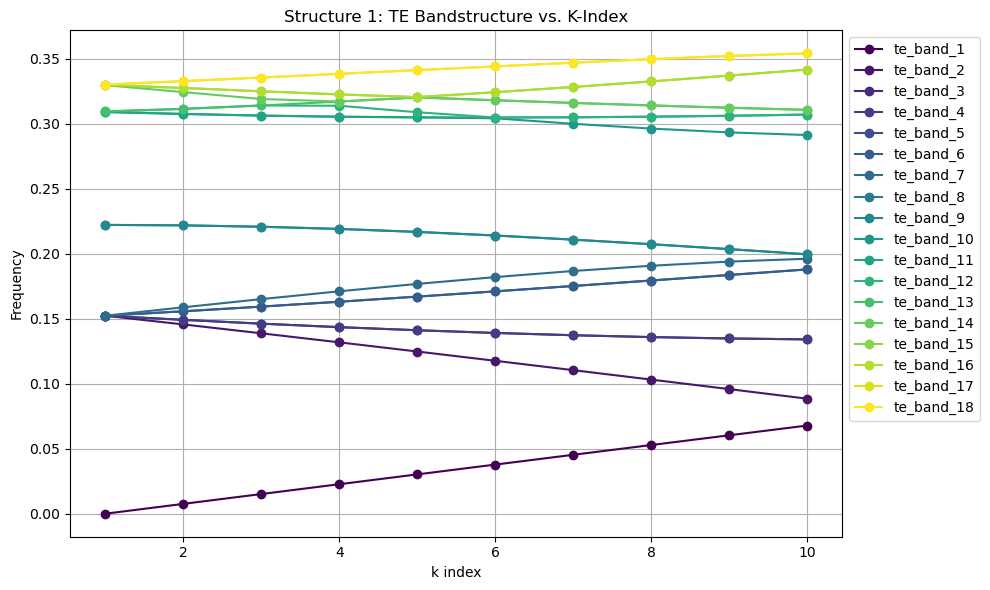

In [131]:
df = pd.read_csv(io.StringIO("\n".join(output)))
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()

plt.figure(figsize=(10, 6))


te_bands = df.filter(like='te_band')
colors = plt.cm.get_cmap('viridis', len(te_bands.columns))

k_indices = df['k_index'] 

for i, column in enumerate(te_bands.columns):
    plt.plot(k_indices, te_bands[column], label=column, marker='o', linestyle='-', color=colors(i))

plt.xlabel('k index')
plt.ylabel('Frequency')
plt.title('Structure 1: TE Bandstructure vs. K-Index')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

Before we move on, let's store the band gap for reference.

In [132]:
gaps = ms.output_gaps(ms.band_range_data)
percent, gap_min, gap_max = gaps[3]

Gap from band 1 (0.06779975954176551) to band 2 (0.08847902688887183), 26.464586549991658%
Gap from band 4 (0.15229392950371848) to band 5 (0.15229428220967578), 0.00023159527764883973%
Gap from band 7 (0.19612068914099337) to band 8 (0.19954561223585549), 1.7312179899799334%
Gap from band 9 (0.22214620743039784) to band 10 (0.29127844981213324), 26.92984896869835%


# 2. Crystal structure with a waveguide defect. 

In order to introduce a line defect, we need a 3x3 grid. Here, we remove the middle row of holes by overwriting them with the background material. 

In [133]:
# Add a defect.
defect_geometry = mp.Cylinder(radius=0.3, material=default_material)
shift_vector = mp.Vector3(1, 0, 0)  
min_multiple = -1
max_multiple = 1  
defect_line = mp.geometric_object_duplicates(shift_vector, min_multiple, max_multiple, defect_geometry)
ms.geometry.extend(defect_line)

Once again, we run simulations to get the TE wave bandstructure. 

In [134]:
import io
import contextlib

f = io.StringIO()
with contextlib.redirect_stdout(f):
    ms.run_te()

output = f.getvalue()
output = [line for line in output.splitlines() if line.startswith("tefreqs")]

_ = ms.output_gaps(ms.band_range_data)


Gap from band 1 (0.06221021832545281) to band 2 (0.08118667301369521), 26.46703775936284%
Gap from band 4 (0.13934973148329752) to band 5 (0.14045197805940485), 0.7878769417876689%
Gap from band 7 (0.18709142720127378) to band 8 (0.18910152066688057), 1.068650264178412%
Gap from band 9 (0.21598598316753562) to band 10 (0.22878177559369278), 5.7539208605390515%
Gap from band 13 (0.2629093186661088) to band 14 (0.2642571035995872), 0.511331858992768%
Gap from band 14 (0.27377140957984475) to band 15 (0.2862898623994682), 4.470386882985843%


Finally, we graph the results. 

/tmp/ipykernel_12865/1374505635.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(te_bands.columns))


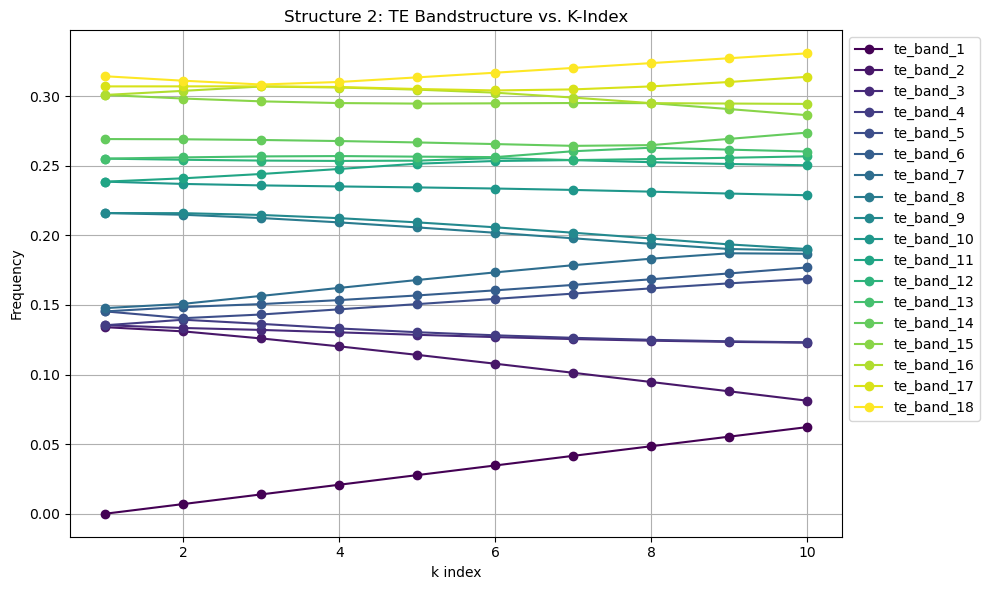

In [135]:
df = pd.read_csv(io.StringIO("\n".join(output)))
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()

plt.figure(figsize=(10, 6))


te_bands = df.filter(like='te_band')
colors = plt.cm.get_cmap('viridis', len(te_bands.columns))

k_indices = df['k_index'] 

for i, column in enumerate(te_bands.columns):
    plt.plot(k_indices, te_bands[column], label=column, marker='o', linestyle='-', color=colors(i))

plt.xlabel('k index')
plt.ylabel('Frequency')
plt.title('Structure 2: TE Bandstructure vs. K-Index')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

Now, we graph the waveguide's bandstructure again, but with the bandgap from part 1 highlighted in gray. 

/tmp/ipykernel_12865/2347428892.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(te_bands.columns))


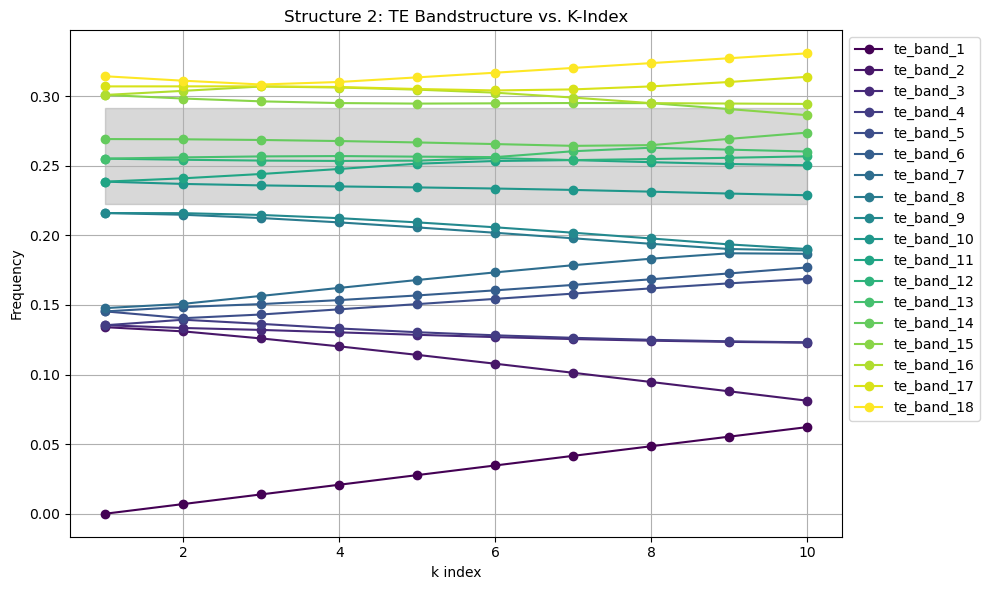

In [136]:
plt.figure(figsize=(10, 6))


te_bands = df.filter(like='te_band')
colors = plt.cm.get_cmap('viridis', len(te_bands.columns))

k_indices = df['k_index'] 

for i, column in enumerate(te_bands.columns):
    plt.plot(k_indices, te_bands[column], label=column, marker='o', linestyle='-', color=colors(i))

plt.xlabel('k index')
plt.ylabel('Frequency')
plt.title('Structure 2: TE Bandstructure vs. K-Index')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.fill_betweenx([gap_min, gap_max], df['k_index'].min(), df['k_index'].max(), color='grey', alpha=0.3, label='Band gap (perfect crystal)')

plt.show()

Let's get group velocities as a function of wavelength.

In [149]:
f = io.StringIO()
ms.resolution = 50
with contextlib.redirect_stdout(f):
    ms.run_te(mpb.display_group_velocities)

vg_str = f.getvalue()
vg_str = [line for line in vg_str.splitlines() if line.startswith("tevelocity")]

In [150]:
def parse_vector3(vector_str):
    """Parse a Vector3 string into its components."""
    # Strip the Vector3<> part and split by comma
    components = vector_str.replace('Vector3<', '').replace('>', '').split(', ')
    # Convert components to float

    return mp.Vector3(*(float(c.strip()) for c in components))

def process_line(line):
    """Process a single line of the file."""
    parts = line.split(', ')
    k_index = int(parts[1].strip())
    vectors = ", ".join(parts[2:]).split(">, ")
    parsed_vectors = [parse_vector3(vector) for vector in vectors]
    return k_index, parsed_vectors

vector_data = [
    process_line(line) for line in vg_str
]

print(vector_data[0])  # List of tuples (k_index, [group velocity for each band at that k-index])


(1, [Vector3<0.0, 0.0, 0.0>, Vector3<1.1230873480499332e-06, -8.308408157178693e-06, 0.0>, Vector3<0.2232800520074636, 0.12924331043420306, 0.0>, Vector3<-0.2232790046526896, -0.12924431910170892, 0.0>, Vector3<0.28163739914051444, 0.16220367537163458, 0.0>, Vector3<-0.28164490657427377, -0.1622040984236531, 0.0>, Vector3<-1.7282405873178152e-06, 1.4492111077823747e-06, 0.0>, Vector3<0.03126118211137341, 0.017958822979657833, 0.0>, Vector3<-0.03131669264618351, -0.01796926858303908, 0.0>, Vector3<-0.014744458485603568, -0.00850599179869047, 0.0>, Vector3<0.014786929024661378, 0.008517810847637626, 0.0>, Vector3<-0.04784030124922175, -0.027419998790693446, 0.0>, Vector3<0.047871147560511626, 0.027366994709934606, 0.0>, Vector3<-9.141262050513743e-06, 9.905696456325785e-06, 0.0>, Vector3<-0.14958864945760875, -0.0865219420546519, 0.0>, Vector3<0.14956672707748683, 0.08655619304102524, 0.0>, Vector3<-3.8122142721624967e-06, 7.623526521871032e-07, 0.0>, Vector3<-0.07594506121553882, -0.043

Now, we select band 11 (arbitrary band in the bandgap) and plot all of its points. 

In [153]:
band_velocities = [vector_data[k][1][9] for k in range(0, len(vector_data))]
band_group_indices = [1 / velocity.norm() for velocity in band_velocities]

# Convert frequencies to wavelengths
band_frequencies = te_bands['te_band_10']
a = 410
band_wavelengths = a / band_frequencies
band_wavelengths = band_wavelengths.values # Convert from a Pandas series to a numpy array for easier handling. 

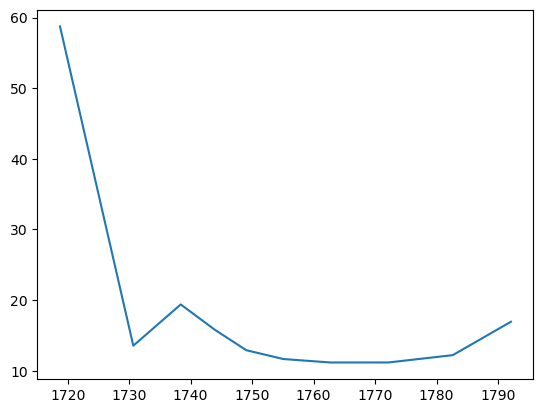

In [154]:
plt.figure()
plt.plot(band_wavelengths, band_group_indices)